# intelligent_placer

Данный пакет представляет собой алгоритм, в который пользователь должен передать путь до изображения. На изображении должены быть многоугольник и предметы. Алгоритм ответит на вопрос можно ли поместить предметы в многоугольник и выведет результаты на экран. В качестве результата может быть выведено изображение с размещением предметов в многоугольнике и результат (True/False) или же, если нет необходимости отрисовки изображений на экран, то просто результат.

Более подробную информацию о требованиях ввода и вывода можно прочитать в файле README.md

Здесь же будут приведены результаты тестов данной библиотеки и краткое описание алгоритма.

# Основная задумка

Сперва происходит чтение файла с изображением из директории, переданной на вход функции. Далее следует обработка изображения для дальнейшей работы, а именно для извлечения с изображения всех контуров, имеющихся на нем. Все контуры добавляются в список. Полученный список подается на вход основному алгоритму анализа возможности расположения предметов в многоугольнике. Алгоритм выдает резултат в формате "True" - предметы могут поместиться в многоугольник и "False" - предметы не могут поместиться в многоугольник. Результат возвращается в виде изображения возможного расположения объектов в многоугольнике и вывода в стандартный поток "True", если расположить можно, или же "False", если расположить нельзя.

# Принцип работы алгоритма

Алгоритм основан на работе с Bounding Box(Bbox). На начальном этапе случайным образом выбирается комбинация предметов, затем для каждого предмета и многоугольника вычисляются крайняя левая точка, крайняя правай точка и 2 отрезка: ширина и высота. Далее алгоритм начинает располагать объекты с крайнего левого угла вдоль оси ОХ(направо) с помощью параллельного переноса, записывая информацию о занимаемого им пространства в двух точках: крайняя правая точка и крайняя нижняя точка. Это потребуется для создания динамических уровней. Затем когда следующий объект уже не помещается на, так называемом, первом уровне, то алгоритм начинает работать со вторым уровнем, границы которого представляют собой ломанную линию сверху(высоты предметов из первого уровня). Алгоритм снова пытается расположить объект, начиная с левой границы многоугольника, учитывая особенности первого уровня. И так далее для каждого следующего уровня. Стоит заметить, что в алгоритме используется возможность комбинации порядка выбора предметов. Алгоритм лучше всего показывает себя с фигурами, близким к прямоугольникам.

# Демонстрация работы

In [2]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


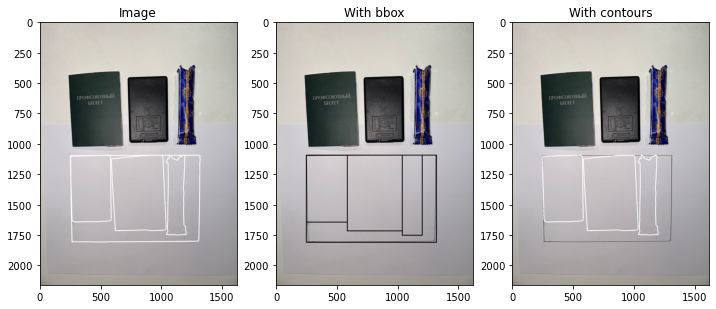

Test number 1 True


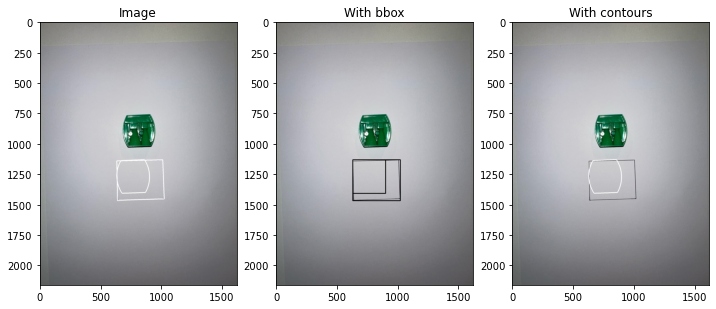

Test number 2 True
Test number 3 False


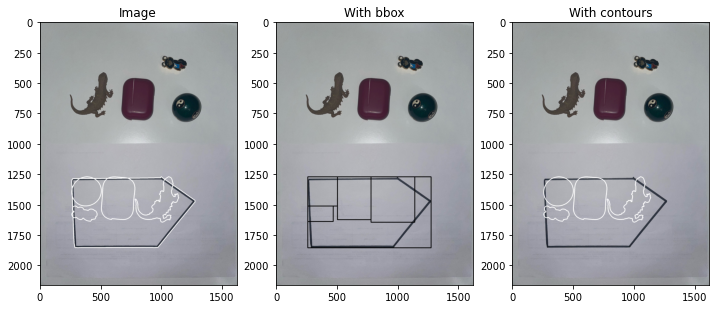

Test number 4 True


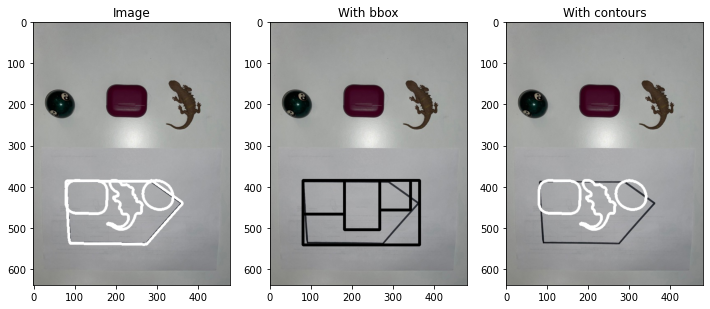

Test number 5 True


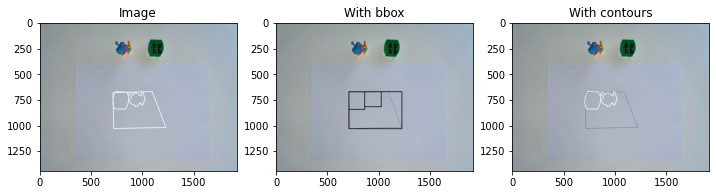

Test number 6 True


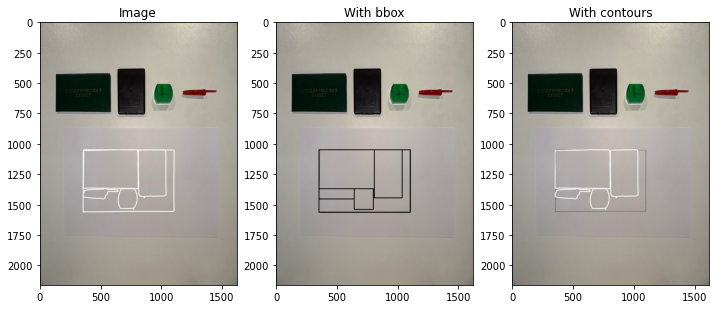

Test number 7 True
Test number 8 False
Test number 9 False
Test number 10 False


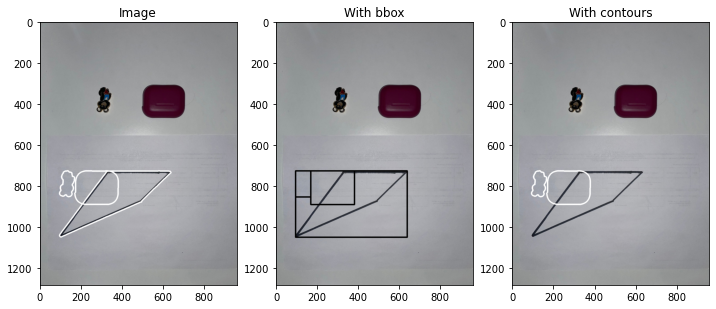

Test number 11 True


In [7]:
import os
import matplotlib.pyplot as plt
from func import get_fill_masks, algorithm, painting


for n in range(1, 12):
    str = f"test{n}.jpg"
    img = plt.imread(os.path.join("tests", str))
    img, _, polys, _ = get_fill_masks(img.copy())
    success = False

    for t in range(0, 8):
        cnts = algorithm(polys[:])
        if cnts:
            success = True
            painting(img, polys, cnts)
            cnts.clear()
            break

    print(f"Test number {n} {success}")


Стоит заметить, что алгоритм обладает довольно хорошой скорость и точностью для данного датасета. Неправильный результат алгоритм выдал только для 8 теста. Также из особенностей Bbox вероятность ложноотрицательного результата ниже, чем вероятность ложноположительного, так как не прямоугольники, аппроксимируясь до прямоугольника увеличиваются в площади.